In [22]:
Sanij Shrestha, Section C

SyntaxError: invalid syntax (<ipython-input-22-acbc858b7786>, line 1)

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [11]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import matplotlib.pyplot as plt

train_clean = pd.read_csv('titanic.csv')

train_clean.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [12]:
'''your code here'''
num_pass = train_clean.shape[0]
print(num_pass)

num_male = train_clean[train_clean["Sex"] == 1].shape[0] 
per_male = (num_male / num_pass) * 100
print(per_male)

num_live = train_clean[train_clean["Survived"] == 1].shape[0]
print((num_live / num_pass) * 100)


891
64.75869809203144
38.38383838383838


Your written answer:

 - <Answer 1>
 - <Answer 2>
 - <Answer 3>

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [4]:
'''your code here'''
num_fem_live = train_clean[(train_clean["Survived"] == 1) & (train_clean["Sex"] == 0)].shape[0]
num_male_live = train_clean[(train_clean["Survived"] == 1) & (train_clean["Sex"] == 1)].shape[0]
print((num_fem_live / num_live) * 100)
print((num_male_live / num_live) * 100)


68.12865497076024
31.871345029239766


Your written answer:

 - <Answer 1>
 - <Answer 2>

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [14]:

total_tickets = train_clean.shape[0]

ticket_stats = train_clean.groupby('Pclass').agg(
    total_tickets=('Pclass', 'count'),
    survival_count=('Survived', 'sum')
)

ticket_stats['% tickets'] = (ticket_stats['total_tickets'] / total_tickets) * 100
ticket_stats['% survivorship'] = (ticket_stats['survival_count'] / ticket_stats['total_tickets']) * 100

print(ticket_stats[['% tickets', '% survivorship']])


        % tickets  % survivorship
Pclass                           
1       24.242424       62.962963
2       20.650954       47.282609
3       55.106622       24.236253


Your written answer:

 - Class 1 
    - % tickets:
    - % survivorship: 
- Class 2 
    - % tickets:
    - % survivorship: 
- Class 3
    - % tickets:
    - % survivorship: 


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

Survivors:
    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0

Non-Survivors:
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


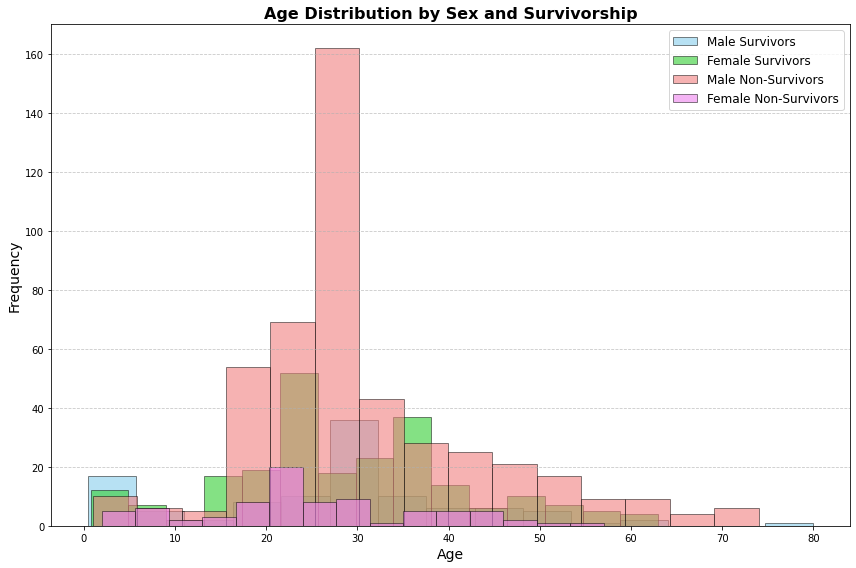

In [18]:
'''Your code here'''

survivors = train_clean[train_clean['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors = train_clean[train_clean['Survived'] == 0][['Age', 'Name', 'Sex']]


print("Survivors:")
print(survivors.head())
print("\nNon-Survivors:")
print(non_survivors.head())

male_survivors = survivors[survivors['Sex'] == 1]['Age']
female_survivors = survivors[survivors['Sex'] == 0]['Age']
male_unlucky = non_survivors[non_survivors['Sex'] == 1]['Age']
female_unlucky = non_survivors[non_survivors['Sex'] == 0]['Age']

plt.figure(figsize=(12, 8))

plt.hist(
    male_survivors, bins=15, alpha=0.6, label='Male Survivors', 
    color='skyblue', edgecolor='black', linewidth=0.8
)
plt.hist(
    female_survivors, bins=15, alpha=0.6, label='Female Survivors', 
    color='limegreen', edgecolor='black', linewidth=0.8
)
plt.hist(
    male_unlucky, bins=15, alpha=0.6, label='Male Non-Survivors', 
    color='lightcoral', edgecolor='black', linewidth=0.8
)
plt.hist(
    female_unlucky, bins=15, alpha=0.6, label='Female Non-Survivors', 
    color='violet', edgecolor='black', linewidth=0.8
)

plt.title('Age Distribution by Sex and Survivorship', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()



### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [21]:
'''Your code here'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

X = train_clean[['Pclass', 'Sex', 'Age', 'Fare']].copy()
y = train_clean['Survived']

X['Age'] = X['Age'].fillna(X['Age'].median())

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the values using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN and applying the fit models
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_train_preds = knn.predict(X_train_scaled)
knn_test_preds = knn.predict(X_test_scaled)

# Decision Tree and applying the fit models
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_train_preds = dt.predict(X_train)
dt_test_preds = dt.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_true, y_pred))
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred))

# KNN
print("KNN Results:")
evaluate_model(y_train, knn_train_preds, "KNN (Train)")
evaluate_model(y_test, knn_test_preds, "KNN (Test)")

# Decision Tree
print("Decision Tree Results:")
evaluate_model(y_train, dt_train_preds, "Decision Tree (Train)")
evaluate_model(y_test, dt_test_preds, "Decision Tree (Test)")


KNN Results:
Confusion Matrix for KNN (Train):
[[404  40]
 [ 65 203]]
Classification Report for KNN (Train):
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       444
           1       0.84      0.76      0.79       268

    accuracy                           0.85       712
   macro avg       0.85      0.83      0.84       712
weighted avg       0.85      0.85      0.85       712

Confusion Matrix for KNN (Test):
[[91 14]
 [15 59]]
Classification Report for KNN (Test):
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Decision Tree Results:
Confusion Matrix for Decision Tree (Train):
[[420  24]
 [ 78 190]]
Classification Report for Decision Tree (Train):
        

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - The KNN model performs consistently well across training and test datasets, with very slight differences in metrics, suggesting no significant overfitting or underfitting.
 - The Decision Tree shows a slight drop in performance on the test data compared to training, suggesting mild overfitting. The higher training recall for class 0 compared to class 1 indicates that the model may prioritize the majority class.


Which models did you fit and which worked better?
 
- KNN worked better overall, especially on the test data, as it provided more consistent and balanced performance without significant overfitting.
-  Decision Tree performed slightly better in identifying the majority class (non-survivors) but struggled more with the minority class (survivors).